In [31]:
import numpy
import scipy.special
import matplotlib.pyplot

In [41]:
# Neural Network Class Definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # number of input, hidden and output nodes.
        self.iNodes = input_nodes
        self.hNodes = hidden_nodes
        self.oNodes = output_nodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is
        # from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.hNodes, -0.5), (self.hNodes, self.iNodes))
        self.who = numpy.random.normal(0.0, pow(self.oNodes, -0.5), (self.oNodes, self.hNodes))
        
        # learning rate
        self.learningRate = learning_rate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # train the neural network
    # two phases to training, the first
    # is calculating the output just as query() does it, and 
    # the second part is backpropagating the errors to inform how the 
    # link weights are refined
    def train(self, input_list, target_list):
        # convert inputs list to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T
        
        # Calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_inputs)
        
        # Calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (Target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights
        # recombinded at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.learningRate * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), \
                                       numpy.transpose(hidden_inputs))
        
        # update the wieghts for links between the input and hidden layers
        self.wih += self.learningRate * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), \
                                       numpy.transpose(inputs))
        
    
    # query the neural network
    def query(self, input_list):
        # convert inputs list to 2d array
        # .T tranposes the matrix
        inputs = numpy.array(input_list, ndmin=2).T
        
        # calculate signals into hidden layers
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [17]:
# Create instance of neural network
n = neuralNetwork(3, 3, 3, .3)

In [18]:
# link weight matrices practice
print n.query([1.0, 0.5, -1.5])

[[ 0.58684762]
 [ 0.48420681]
 [ 0.45099378]]


In [35]:
data_file = open("Desktop/mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = data_file.readlines()
data_file.close()

In [36]:
len(training_data_list)

100

In [37]:
training_data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

['5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '18', '18', '18', '126', '136', '175', '26', '166', '255', '247', '127', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '30', '36', '94', '154', '170', '253', '253', '253', '253', '253', '225', '172', '253', '242', '

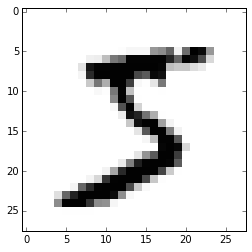

In [38]:
%matplotlib inline
# lets split the long string by its commas
all_values = training_data_list[0].split(',')
print(all_values)

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')


In [34]:
# We need to scale out input to our neural network
# scale input to range .01 to 1.00
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * .99) + .01
print(scaled_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [77]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = .3

# create instance of neural network

my_net = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# train the neural network
# go through all records in the training data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * .99) + .01
    # create the target output values (all .01, except the desired label which is .99)
    targets = numpy.zeros(output_nodes) + .01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = .99
    my_net.train(inputs, targets)
    
# output nodes is 10
oNodes = 10
targets = numpy.zeros(oNodes) + .01
targets[int(all_values[0])] = .99

In [65]:
# Test The first example for fun

# Load the mnist test data CSV file into a list
test_data_file = open("Desktop/mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# Get the first test record
all_values = test_data_list[0].split(',')
# Print the label
print(all_values[0])

7


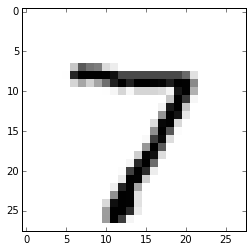

In [54]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')


In [55]:
my_net.query((numpy.asfarray(all_values[1:]) / 255.0 * .99) + .01)

array([[  1.77399876e-02],
       [  2.34024582e-03],
       [  2.87165897e-03],
       [  1.67797221e-03],
       [  2.55762518e-02],
       [  3.03383904e-01],
       [  3.46628313e-04],
       [  9.74430696e-01],
       [  3.74495543e-01],
       [  1.57815437e-01]])

#Test The Entire Neural Network

In [75]:
# scorecard for how well the netowrk performs, intially empty scorecard = []
scorecard = []
# go through all the records in the test data set 
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer in first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * .99) + .01
    # query the network
    outputs = my_net.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # netowrk's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)

(7, 'correct label')
(7, "network's answer")
(2, 'correct label')
(0, "network's answer")
(1, 'correct label')
(1, "network's answer")
(0, 'correct label')
(0, "network's answer")
(4, 'correct label')
(4, "network's answer")
(1, 'correct label')
(1, "network's answer")
(4, 'correct label')
(9, "network's answer")
(9, 'correct label')
(3, "network's answer")
(5, 'correct label')
(5, "network's answer")
(9, 'correct label')
(7, "network's answer")


In [78]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 0, 0, 1, 0]


# Calculate the performance score

In [105]:
scorecard_array = numpy.asarray(scorecard)
scoreSum = float(scorecard_array.sum())
scoreLen = float(scorecard_array.size)
finalScore = str((scoreSum/scoreLen) * 100)
print "Performance = " + finalScore + "%"

Performance = 60.0%


#Train on Full MNIST Data-Set
